## get AOJ metadata

In [ ]:
import numpy as np
import json
import os
from datamodules.particle_clouds.aoj import AspenOpenJets

def extract_aoj_metadata(path, filename):
    """Compute statistics for the given data.
    """

    file_path = os.path.join(path, filename)

    aoj = AspenOpenJets(file_path)
    data = aoj()
    continuous = data.continuous
    mask = data.mask
    mask_bool = mask.squeeze(-1) > 0

    nums = mask.sum(dim=1).squeeze()
    hist, _ = np.histogram(
        nums, bins=np.arange(0, continuous.shape[1] + 2, 1), density=True
    )

    return {
        "source file": filename,
        "num_jets_sample": continuous.shape[0],
        "num_particles_sample": nums.sum().item(),
        "max_num_particles_per_jet": continuous.shape[1],
        "continuous_mean": continuous[mask_bool].mean(0).tolist(),
        "continuous_std": continuous[mask_bool].std(0).tolist(),
        "continuous_min": continuous[mask_bool].min(0).values.tolist(),
        "continuous_max": continuous[mask_bool].max(0).values.tolist(),
        "continuous_features": {"pt": 0, "eta_rel": 1, "phi_rel": 2},
        "tokens": {
            0: {"name": "photon", "color": "gold", "marker": "o", "tex": r"\gamma"},
            1: {"name": "h0", "color": "darkred", "marker": "o", "tex": r"$\rm h^0$",},
            2: {"name": "h-", "color": "darkred", "marker": "v", "tex": r"$\rm h^-$"},
            3: {"name": "h+", "color": "darkred", "marker": "^", "tex": r"$\rm h^+$"},
            4: {"name": "e-", "color": "blue", "marker": "v", "tex": r"e^-"},
            5: {"name": "e+", "color": "blue", "marker": "^", "tex": r"e^+"},
            6: {"name": "mu-", "color": "green", "marker": "v", "tex": r"\mu^-"},
            7: {"name": "mu+", "color": "green", "marker": "^", "tex": r"\mu^+"},
        },
        "categorical_probs": hist.tolist(),
    }

In [ ]:
aoj_dir = "/home/df630/Multimodal-Bridges/data/aoj"
filename = "RunG_batch0.h5"
metadata = extract_aoj_metadata(aoj_dir, filename)

with open(os.path.join(aoj_dir, "metadata.json"), "w") as f:
    json.dump(metadata, f, indent=4)

## Examine AOJ data

In [1]:
import numpy as np
import json
import matplotlib.pyplot as plt

from datamodules.particle_clouds.aoj import AspenOpenJets

aoj = AspenOpenJets(data_dir="/home/df630/Multimodal-Bridges/data/aoj",
                    data_files="RunG_batch0.h5"
                    )

aoj_ = AspenOpenJets(data_dir="/home/df630/Multimodal-Bridges/data/aoj",
                    data_files="RunG_batch0.h5"
                    )

data = aoj.load_dataset(num_jets=10000, download=False, transform='standardize')
jets = aoj_.get_jet_features(data, transform='standardize')

INFO:  Loading metadata from /home/df630/Multimodal-Bridges/data/aoj/metadata.json.
INFO:  Loading metadata from /home/df630/Multimodal-Bridges/data/aoj/metadata.json.
Clustering jets with fastjet
Jet definition: Longitudinally invariant kt algorithm with R = 0.8 and pt-ordered Winner-Takes-All recombination
Calculating N-subjettiness
#--------------------------------------------------------------------------
#                         FastJet release 3.4.2
#                 M. Cacciari, G.P. Salam and G. Soyez                  
#     A software package for jet finding and analysis at colliders      
#                           http://fastjet.fr                           
#	                                                                      
# Please cite EPJC72(2012)1896 [arXiv:1111.6097] if you use this package
# for scientific work and optionally PLB641(2006)57 [hep-ph/0512210].   
#                                                                       
# FastJet is provided withou

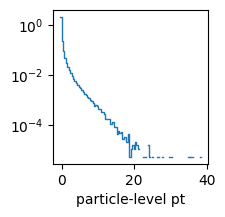

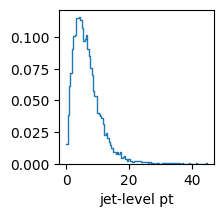

In [2]:
_, ax = plt.subplots(1, 1, figsize=(2, 2))
jets.constituents.histplot("pt", ax=ax, fill=False, bins=100, lw=1, log_scale=(False, True), stat="density")

_, ax = plt.subplots(1, 1, figsize=(2, 2))
jets.histplot("pt", ax=ax, fill=False, bins=100, lw=1, stat="density")


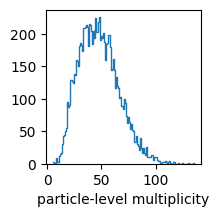

In [17]:
_, ax = plt.subplots(1, 1, figsize=(2, 2))

jets.constituents.histplot(
    "multiplicity", ax=ax, lw=1, fill=False, discrete=True,
)


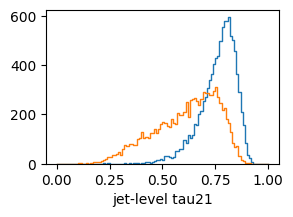

In [18]:
_, ax = plt.subplots(1, 1, figsize=(3, 2))

jets.histplot("tau32", ax=ax, lw=1, fill=False, binrange=(0, 1), bins=100)
jets.histplot("tau21", ax=ax, lw=1, fill=False, binrange=(0, 1), bins=100)


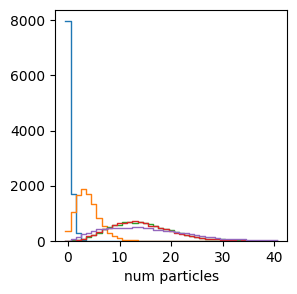

In [9]:
_, ax = plt.subplots(1, 1, figsize=(3, 3))

jets.histplot("numLeptons", fill=False, ax=ax, lw=1, binrange=(0, 40), discrete=True)
jets.histplot(
    "numNeutralHadrons", fill=False, ax=ax, lw=1, binrange=(0, 40), discrete=True
)
jets.histplot(
    "numPositiveHadrons", fill=False, ax=ax, lw=1, binrange=(0, 40), discrete=True
)
jets.histplot(
    "numNegativeHadrons", fill=False, ax=ax, lw=1, binrange=(0, 40), discrete=True
)
jets.histplot(
    "numPhotons",
    fill=False,
    xlabel="num particles",
    ax=ax,
    lw=1,
    binrange=(0, 40),
    discrete=True,
)


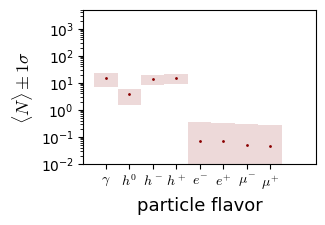

In [10]:
_, ax = plt.subplots(1, 1, figsize=(3, 2))

jets.plot_flavor_count_per_jet(ax=ax)

## preprocessing:

In [1]:
import numpy as np
import json
import matplotlib.pyplot as plt

from datamodules.particle_clouds.aoj import AspenOpenJets

aoj = AspenOpenJets(data_dir="/home/df630/Multimodal-Bridges/data/aoj",
                    data_files="RunG_batch0.h5",
                    transform='standardize')

particle_clouds = aoj(num_jets=10000)

# jets = JetFeatures(particle_clouds)


ImportError: cannot import name 'AspenOpenJets' from partially initialized module 'datamodules.particle_clouds.aoj' (most likely due to a circular import) (/home/df630/Multimodal-Bridges/multimodal_bridges/datamodules/particle_clouds/aoj.py)

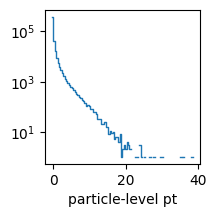

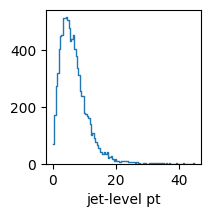

In [8]:
_, ax = plt.subplots(1, 1, figsize=(2, 2))
jets.constituents.histplot("pt", ax=ax, fill=False, bins=100, lw=1, log_scale=(False, True))

_, ax = plt.subplots(1, 1, figsize=(2, 2))
jets.histplot("pt", ax=ax, fill=False, bins=100, lw=1)

In [9]:
import numpy as np
import json
import matplotlib.pyplot as plt

from datamodules.particle_clouds.aoj import AspenOpenJets
from datamodules.particle_clouds.utils import JetFeatures

aoj = AspenOpenJets("/home/df630/Multimodal-Bridges/data/aoj/RunG_batch0.h5")
particle_clouds = aoj(num_jets=10000, transform='log_pt')
jets = JetFeatures(particle_clouds)

Clustering jets with fastjet
Jet definition: Longitudinally invariant kt algorithm with R = 0.8 and pt-ordered Winner-Takes-All recombination
Calculating N-subjettiness


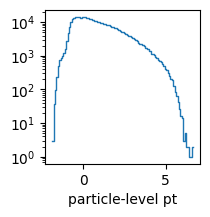

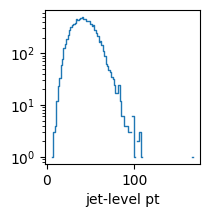

In [10]:
_, ax = plt.subplots(1, 1, figsize=(2, 2))
jets.constituents.histplot("pt", ax=ax, fill=False, bins=100, lw=1, log_scale=(False, True))

_, ax = plt.subplots(1, 1, figsize=(2, 2))
jets.histplot("pt", ax=ax, fill=False, bins=100, lw=1, log_scale=(False, True))